In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor

%matplotlib inline

In [2]:
data = pd.read_csv(r'../data/all_wells.csv')
data.fillna(data.mean(), inplace=True)
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),...,water 3,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12
0,32600.0,52200.0,0.04,0.006,0.31,1.224949e+07,0.141918,0.858082,1.059118e+06,220.584462,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13
1,32703.0,52200.0,0.02,0.001,0.31,1.224911e+07,0.141804,0.858196,7.632097e+05,301.003964,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13
2,32807.0,52200.0,0.03,0.002,0.31,1.224864e+07,0.141688,0.858312,7.632097e+05,301.003964,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13
3,32910.0,52200.0,0.04,0.008,0.31,1.224807e+07,0.141571,0.858429,5.634563e+05,286.379301,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13
4,33014.0,52200.0,0.03,0.004,0.31,1.224740e+07,0.141452,0.858548,7.632097e+05,301.003964,...,773.54,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13


In [3]:
data['OIP'] = data['porosity'] * data['oil saturation']
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),...,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12,OIP
0,32600.0,52200.0,0.04,0.006,0.31,1.224949e+07,0.141918,0.858082,1.059118e+06,220.584462,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.034323
1,32703.0,52200.0,0.02,0.001,0.31,1.224911e+07,0.141804,0.858196,7.632097e+05,301.003964,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.017164
2,32807.0,52200.0,0.03,0.002,0.31,1.224864e+07,0.141688,0.858312,7.632097e+05,301.003964,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.025749
3,32910.0,52200.0,0.04,0.008,0.31,1.224807e+07,0.141571,0.858429,5.634563e+05,286.379301,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.034337
4,33014.0,52200.0,0.03,0.004,0.31,1.224740e+07,0.141452,0.858548,7.632097e+05,301.003964,...,715.78,655.31,595.0,534.94,476.35,418.38,359.23,301.14,241.13,0.025756


In [4]:
x = data[['easting', 'northing']]

In [11]:
porosity_model = model_porosity()
oip_model = model_oip()

Score 0.6268415070920187
Score 0.6232726807128715


In [6]:
def predict_and_plot(model, precision=2000):
    easting = x['easting']
    northing = x['northing']
    grid = np.mgrid[easting.min():easting.max():precision, northing.min():northing.max():precision]
    grid = grid.reshape((2, -1))

    input_array = []

    for i in range(len(grid[0])):
        input_array.append((grid[0][i], grid[1][i]))

    predictions = model.predict(input_array)
    print(len(predictions), grid.shape)

    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.scatter(grid[0], grid[1], c=predictions)
    plt.colorbar()

2400 (2, 2400)


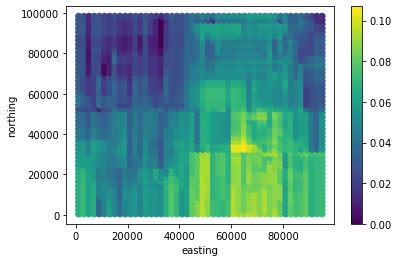

In [12]:
predict_and_plot(porosity_model)

In [8]:
predict_and_plot(oip_model)

NameError: name 'oip_model' is not defined

In [9]:
def model_porosity():
    train_x, test_x, train_y, test_y = train_test_split(x, data['porosity'], test_size=0.8, random_state=0)
    model = BaggingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Score', model.score(test_x, test_y))
    
    return model

In [10]:
def model_oip():
    train_x, test_x, train_y, test_y = train_test_split(x, data['OIP'], test_size=0.8, random_state=0)
    model = BaggingRegressor(random_state=0)
    model.fit(train_x, train_y)
    
    print('Score', model.score(test_x, test_y))
    
    return model